In [5]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px  # for interative visualizations

In [6]:
df = pd.read_csv('wine.csv')

In [7]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [13]:
df_X = df.copy().drop('color', axis = 1)
X = df_X
y = df['color']
your_labels = list(df['color'].unique())

s = scaler()
wineScaled = s.fit_transform(X)

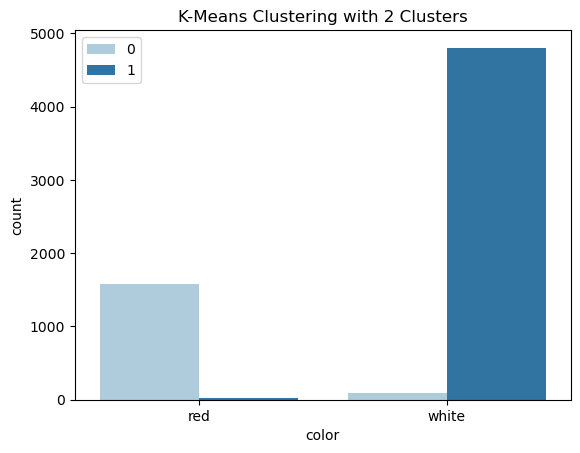

In [24]:
# Apply K-Means clustering algorithm with 2 clusters
kmeans_2 = KMeans(n_clusters=2, n_init=500, random_state=512)
clusters_2 = kmeans_2.fit_predict(wineScaled)

# Plot the result of the K-Means clustering
sns.countplot(x=df['color'], hue=clusters_2, data=df, palette='Paired')
plt.title('K-Means Clustering with 2 Clusters')
plt.show()

In [16]:
confusion_matrix_2 = pd.crosstab(df['color'], clusters_2)
print(confusion_matrix_2)

# Calculate the accuracy for each cluster
prob_table_2 = confusion_matrix_2.div(confusion_matrix_2.sum(axis=1), axis=0)
print(prob_table_2)

col_0     0     1
color            
red    1574    25
white    94  4804
col_0         0         1
color                    
red    0.984365  0.015635
white  0.019192  0.980808


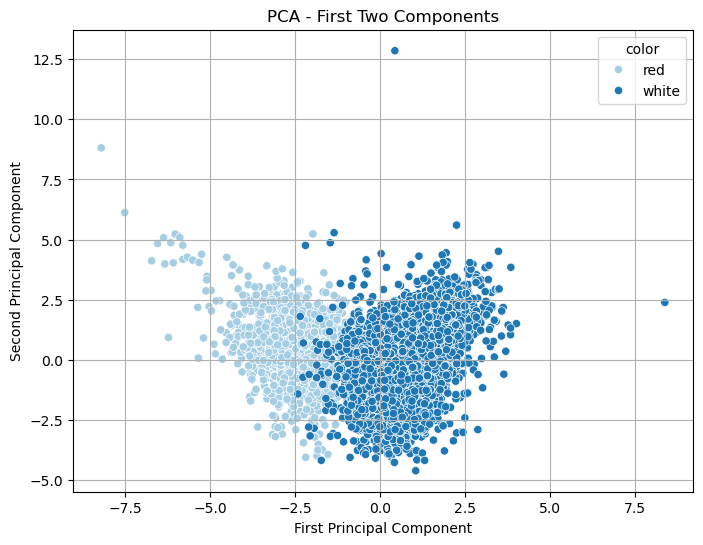

In [25]:
pca = PCA()
Xpca = pca.fit_transform(wineScaled)

# plot help from chatGPT
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1], hue=df['color'], palette='Paired')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components')
plt.grid()
plt.show()

From the above graph, we can see that there are two groupings with some overlap, between the two principal components. We can conclude that, first two principal components satisfactorily identify the wine type at the expense of some minimal missclassification.

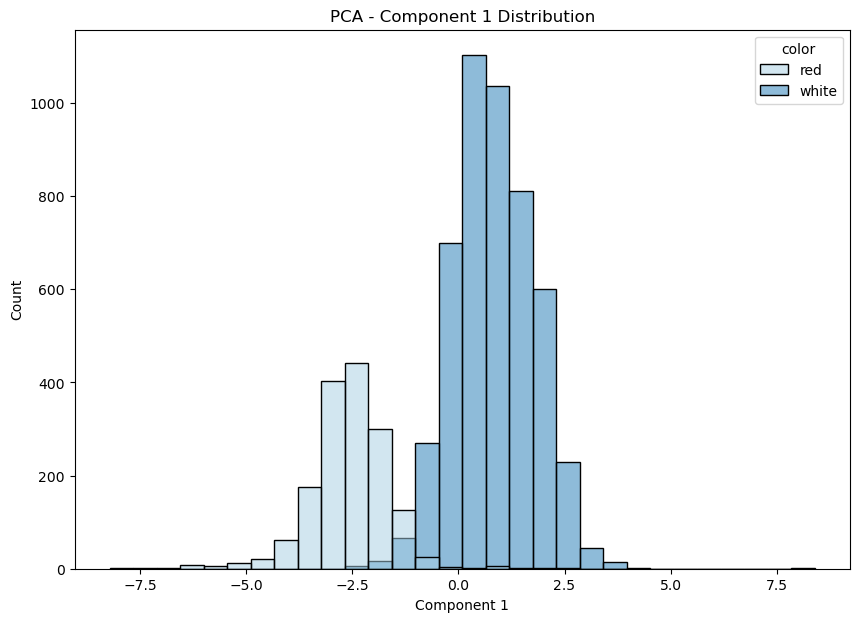

In [28]:
# Plot the first component against count
plt.figure(figsize=(10, 7))
sns.histplot(x=Xpca[:, 0], kde=False, hue=df['color'], palette='Paired', bins=30)
plt.xlabel('Component 1')
plt.ylabel('Count')
plt.title('PCA - Component 1 Distribution')
plt.show()

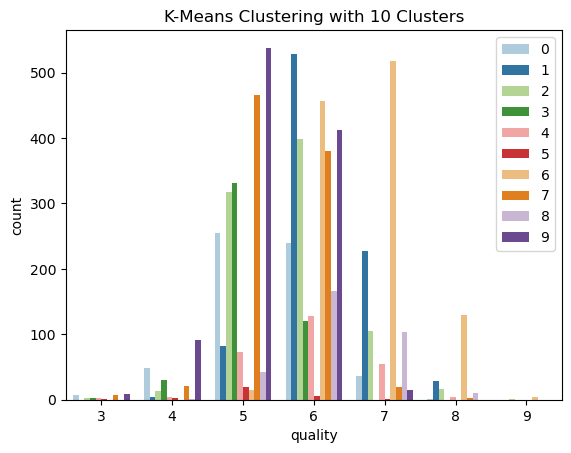

In [29]:
kmeans_10 = KMeans(n_clusters=10, n_init=50, random_state=512)
clusters_10 = kmeans_10.fit_predict(wineScaled)

# Plot the result of the K-Means clustering to check quality
sns.countplot(x=df['quality'], hue=clusters_10, data=df, palette='Paired')
plt.title('K-Means Clustering with 10 Clusters')
plt.show()

In [30]:
# Create the confusion matrix for quality and clusters
confusion_matrix_10 = pd.crosstab(df['quality'], clusters_10)
print(confusion_matrix_10)

# Calculate the accuracy for each cluster
prob_table_10 = confusion_matrix_10.div(confusion_matrix_10.sum(axis=1), axis=0)
print(prob_table_10)

col_0      0    1    2    3    4   5    6    7    8    9
quality                                                 
3          7    0    2    3    2   1    0    7    0    8
4         49    4   14   30    4   2    0   21    1   91
5        255   82  317  331   73  19   15  465   43  538
6        240  528  399  120  128   6  456  380  166  413
7         37  227  105    0   55   1  517   19  103   15
8          1   29   17    0    4   0  129    2   11    0
9          0    0    1    0    0   0    4    0    0    0
col_0           0         1         2         3         4         5         6  \
quality                                                                         
3        0.233333  0.000000  0.066667  0.100000  0.066667  0.033333  0.000000   
4        0.226852  0.018519  0.064815  0.138889  0.018519  0.009259  0.000000   
5        0.119270  0.038354  0.148269  0.154818  0.034144  0.008887  0.007016   
6        0.084626  0.186178  0.140691  0.042313  0.045134  0.002116  0.160790   
7

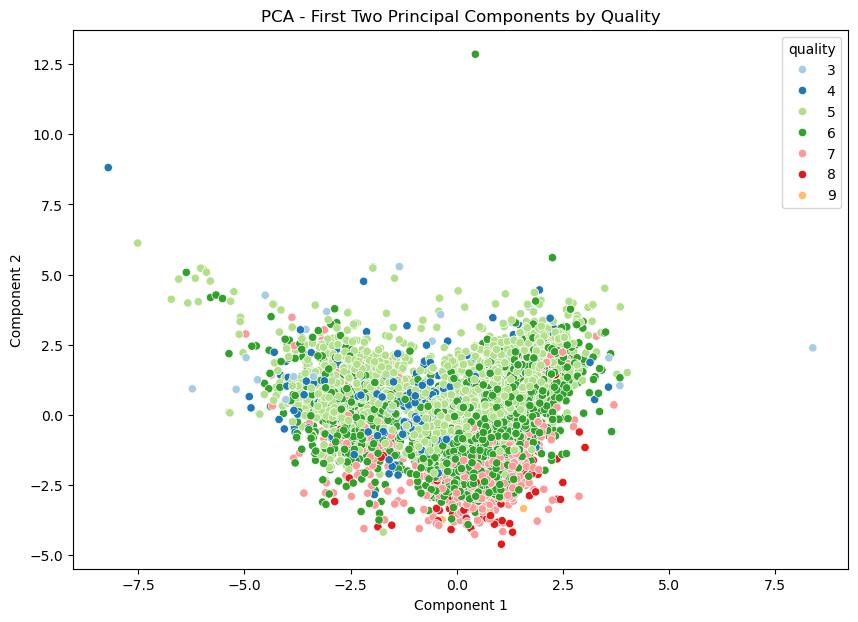

In [31]:
# Plot the first two Principal Components with wine quality
plt.figure(figsize=(10, 7))
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1], hue=df['quality'], palette='Paired')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - First Two Principal Components by Quality')
plt.show()

In [34]:
print("""
Final Conclusions:
1. Both K-Means clustering and PCA methods are capable of distinguishing the red wines from the white wines.
2. Both K-Means clustering and PCA methods are not capable of distinguishing the higher quality wines from the lower quality wines.
3. For this dataset, PCA makes more sense for two reasons:
   a. PCA is able to characterize the attributes which give each type of wine its properties.
   b. K-Means clustering algorithm would not give desirable results with the variation of K value.
""")


Final Conclusions:
1. Both K-Means clustering and PCA methods are capable of distinguishing the red wines from the white wines.
2. Both K-Means clustering and PCA methods are not capable of distinguishing the higher quality wines from the lower quality wines.
3. For this dataset, PCA makes more sense for two reasons:
   a. PCA is able to characterize the attributes which give each type of wine its properties.
   b. K-Means clustering algorithm would not give desirable results with the variation of K value.



In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
Xt = tsne.fit_transform(wineScaled)



/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.003s...
[t-SNE] Computed neighbors for 6497 samples in 0.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.781485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.334091
[t-SNE] KL divergence after 1000 iterations: 1.407402


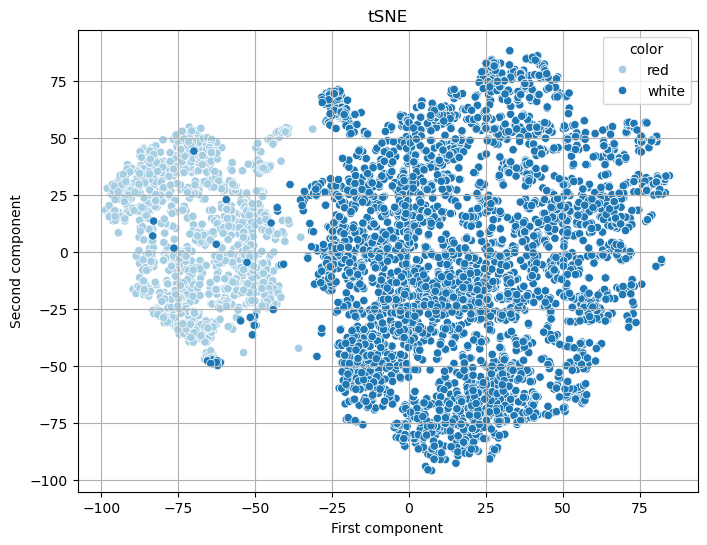

In [33]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xt[:, 0], y=Xt[:, 1], hue=y, palette='Paired')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('tSNE')
plt.grid()
plt.show()

Conclusion

- PCA is effective at separating red and white wines based on the 11 chemical properties, as demonstrated by the clear separation in the PCA plot.
- K-Means Clustering shows that an unsupervised technique can partly distinguish between red and white wines. This indicates that the chemical properties contain enough information for this differentiation.
- For distinguishing wine quality, further analysis would be needed to determine if these clusters or PCA components correlate with wine quality scores. We would typically look for a pattern where different clusters or PCA regions correspond to different quality scores.